In [2]:
from linearmodels import PooledOLS
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import plotly.express as px
from matplotlib import colors
from os import listdir
from os.path import isfile, join
import numpy as np

In [42]:
soy_data = pd.read_csv('https://raw.githubusercontent.com/friedrich-henrique/datasets_soybeans_research/main/soytrade_dataset.csv')

In [43]:
#convert year to datetime
soy_data['Year'] = pd.to_datetime(soy_data['Year'], format='%Y')

In [54]:
df=soy_data.set_index(['Source', 'Year'])

In [55]:
df.head()   

Target  trade_value  ln_trade_value  Source Area   
Source Year                                                          
ABW    2000-01-01    COL        0.056       -2.882404        180.0  \
       2003-01-01    COL        0.257       -1.358679        180.0   
       2008-01-01    NLD        2.916        1.070213        180.0   
       2009-01-01    NLD        1.048        0.046884        180.0   
       2008-01-01    USA        0.009       -4.710531        180.0   

                   Target Area  Source Exchange Rate  Target Exchange Rate   
Source Year                                                                  
ABW    2000-01-01    1141750.0                  1.79               2087.92  \
       2003-01-01    1141750.0                  1.79               2877.54   
       2008-01-01      41540.0                  1.79                  0.68   
       2009-01-01      41540.0                  1.79                  0.72   
       2008-01-01    9831510.0                  1.79                  1.00   

                   Ex Rate Source / Target  Ex Rate Target / Source   
Source Year                                                           
ABW    2000-01-01                 0.000857              1166.435754  \
       2003-01-01                 0.000622              1607.564246   
       2008-01-01                 2.632353                 0.379888   
       2009-01-01                 2.486111                 0.402235   
       2008-01-01                 1.790000                 0.558659   

                   Source Consumer Price Index  Target Consumer Price Index   
Source Year                                                                   
ABW    2000-01-01                        72.03                        58.22  \
       2003-01-01                        79.36                        71.61   
       2008-01-01                       100.10                        97.58   
       2009-01-01                        97.96                        98.74   
       2008-01-01                       100.10                        98.74   

                   exchange_rate ijt  Source GDP  Target GDP   
Source Year                                                    
ABW    2000-01-01        1443.118643         NaN         NaN  \
       2003-01-01        1781.543060         NaN         NaN   
       2008-01-01           0.389699         NaN       98.85   
       2009-01-01           0.399057         NaN       99.07   
       2008-01-01           0.566354         NaN       98.18   

                   level of output ijt  
Source Year                             
ABW    2000-01-01                  NaN  
       2003-01-01                  NaN  
       2008-01-01                  NaN  
       2009-01-01                  NaN  
       2008-01-01                  NaN

In [56]:
exog = sm.tools.tools.add_constant(df[['Target Area', 'Source Area', 'Target Exchange Rate', 'Source Exchange Rate']])

exog

const  Target Area  Source Area  Target Exchange Rate   
Source Year                                                                
ABW    2000-01-01    1.0    1141750.0        180.0               2087.92  \
       2003-01-01    1.0    1141750.0        180.0               2877.54   
       2008-01-01    1.0      41540.0        180.0                  0.68   
       2009-01-01    1.0      41540.0        180.0                  0.72   
       2008-01-01    1.0    9831510.0        180.0                  1.00   
...                  ...          ...          ...                   ...   
ZWE    2014-01-01    1.0     752610.0     390760.0                  6.15   
       2016-01-01    1.0     752610.0     390760.0                 10.31   
       2017-01-01    1.0     752610.0     390760.0                  9.52   
       2020-01-01    1.0     752610.0     390760.0                 18.34   
       2021-01-01    1.0          NaN          NaN                 20.02   

                   Source Exchange Rate  
Source Year                              
ABW    2000-01-01                  1.79  
       2003-01-01                  1.79  
       2008-01-01                  1.79  
       2009-01-01                  1.79  
       2008-01-01                  1.79  
...                                 ...  
ZWE    2014-01-01                   NaN  
       2016-01-01                   NaN  
       2017-01-01                   NaN  
       2020-01-01                 51.33  
       2021-01-01                 88.55  

[26062 rows x 5 columns]

In [62]:
endog = df['trade_value']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)
# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

c:\Users\hique\AppData\Local\Programs\Python\Python39\lib\site-packages\linearmodels\panel\model.py:884: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


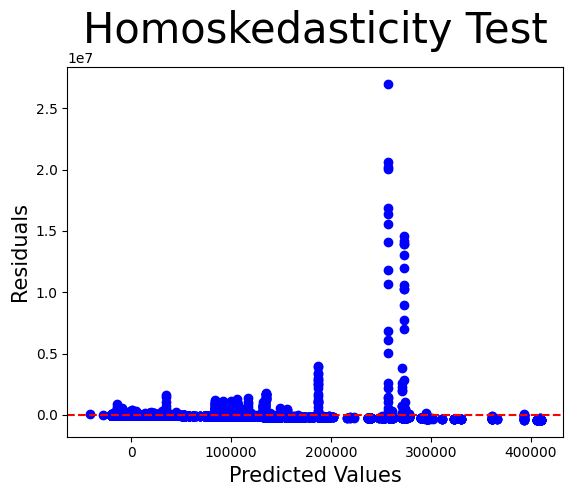

In [63]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = "blue")
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel("Predicted Values", fontsize = 15)
ax.set_ylabel("Residuals", fontsize = 15)
ax.set_title("Homoskedasticity Test", fontsize = 30)
plt.show()